In [368]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import util
import matplotlib.pyplot as plt
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree
from scipy.cluster import hierarchy
from six import StringIO
from IPython.display import Image
import pydotplus

## Download data

In [369]:
# Get the current working directory
directory = os.getcwd()

# Load data
directory_data = directory + '\\Data\\sfo 2018_data file_final_Weighted.xlsx'
data_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='DATA')

## Get to know data

In [370]:
len(data_2018)

2809

In [371]:
data_2018.head()

,RESPNUM,CCGID,RUNID,INTDATE,DAY,GATE,BAREA,STRATA,PEAK,METH,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,552,21,2,102,G,3,3,1,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,552,21,2,102,G,3,3,1,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,552,21,2,102,G,3,3,1,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,552,21,2,102,G,3,3,1,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,552,21,2,102,G,3,3,1,...,15,2,2,2,2,2,2,2,1,0.670484


In [372]:
data_2018.describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,...,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,1821.937700,1419.065504,14.079032,4.127447,50.647205,2.148095,2.161979,1.012460,1.880384,1414.961552,...,18.608046,1.657529,4.045568,1.448558,2.046992,1.817017,1.595586,1.541118,1.103596,0.999999
std,942.654669,861.370970,8.193408,1.692994,33.241023,0.780914,0.750427,0.125978,0.324569,1714.986966,...,26.604692,0.730039,1.864170,0.611737,1.493790,0.700515,0.678995,0.697855,0.442109,0.490976
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038
25%,1052.000000,707.000000,8.000000,3.000000,12.000000,2.000000,2.000000,1.000000,2.000000,394.000000,...,7.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.670484
50%,1869.000000,1409.000000,15.000000,4.000000,52.000000,2.000000,2.000000,1.000000,2.000000,857.000000,...,10.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.061139
75%,2594.000000,2116.000000,20.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1747.000000,...,14.000000,2.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,99.000000,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528


In [373]:
data_2018.columns

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'ARRTIME',
       'DEPTIME', 'HOWLONG', 'Q2PURP1', 'Q2PURP2', 'Q2PURP3', 'Q3GETTO1',
       'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q4BAGS', 'Q4STORE', 'Q4FOOD',
       'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD',
       'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP',
       'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL',
       'Q7ALL', 'Q8-1', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9Boarding',
       'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q9-1',
       'Q9-2', 'Q9-3', 'Q10Safe', 'Q10-1', 'Q10-2', 'Q10-3', 'Q11TSAPRE',
       'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q13COUNTY', 'Q13GETRATE',
       'Q14FIND ', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q15A', 'Q15-1', 'Q15-2',
       'Q15-3', 'N

In [374]:
data_2018.rename(columns = {'NETPRO  ':'NETPRO'}, inplace = True)
data_2018.rename(columns = {'Q14FIND ':'Q14FIND'}, inplace = True)

### Null varaibles

In [375]:
# Variable with null
columns_null = ['Q2PURP2', 'Q2PURP3', 'Q3GETTO2', 'Q3GETTO3', 'Q3PARK', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9-2', 'Q9-3', 'Q10-2', 'Q10-3', 'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q15A', 'Q15-1', 'Q15-2', 'Q15-3', 'Q18CITY', 'Q18COUNTY', 'Q18ZIP', 'Q18STATE', 'Q18COUNTRY']
data_2018.isnull().sum()

RESPNUM    0
CCGID      0
RUNID      0
INTDATE    0
DAY        0
          ..
Q23FLY     0
Q24SJC     0
Q24OAK     0
LANG       0
WEIGHT     0
Length: 100, dtype: int64

In [376]:
# Variable with hidden null as 0
columns_0 = ['Q2PURP1', 'Q4BAGS', 'Q4STORE', 'Q4FOOD', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'Q9Boarding', 'Q9AirTrain', 'Q9Rental', 'Q9Food', 'Q9Restroom', 'Q9All', 'Q10Safe', 'Q10-1', 'Q11TSAPRE', 'Q13GETRATE', 'Q14FIND', 'Q14PASSTHRU', 'Q15PROBLEM',  'Q17LIVE', 'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24SJC', 'Q24OAK']
print(pd.unique(data_2018['Q24OAK']))

[2 1 0 3]


In [377]:
# Variable with hidden null as BLANK - 'Q7ALL'
data_2018.loc[data_2018['Q7ALL'] == 'BLANK', 'Q7ALL'] = 0
# Variable with hidden null as N - 'HOWLONG', 'ARRTIME', 'DEPTIME'
data_2018.loc[data_2018['HOWLONG'] == 'N', 'HOWLONG'] = 0
data_2018.loc[data_2018['ARRTIME'] == 'N', 'ARRTIME'] = 0
data_2018.loc[data_2018['DEPTIME'] == 'N', 'DEPTIME'] = 0
# Variable with hidden null as 11 - 'NETPRO'
data_2018.loc[data_2018['NETPRO'] == 11, 'NETPRO'] = 0
# Variable with hidden null as 99 - 'HOME'
data_2018.loc[data_2018['HOME'] == 99, 'HOME'] = 0
columns_0.extend(['Q7ALL', 'HOWLONG', 'ARRTIME', 'DEPTIME', 'NETPRO', 'HOME'])

In [378]:
# Columns without null values
columns_not_null = data_2018.columns.copy().drop(columns_null + columns_0)
columns_not_null

Index(['RESPNUM', 'CCGID', 'RUNID', 'INTDATE', 'DAY', 'GATE', 'BAREA',
       'STRATA', 'PEAK', 'METH', 'SAQ', 'AIRLINE', 'DESTINATION', 'FLIGHT',
       'AIRLINE_CODE', 'DEST_CODE', 'DESTGEO', 'DESTMARK', 'Q3GETTO1', 'Q9-1',
       'Q13COUNTY', 'LANG', 'WEIGHT'],
      dtype='object')

In [379]:
# Number of records after dropping all hidden null records
data_2018_not_null = data_2018.copy()
for col in columns_0 + columns_null:
    data_2018_not_null = data_2018_not_null.loc[data_2018_not_null[col] != 0]
len(data_2018_not_null)

375

### New variable - Q7MEAN

In [380]:
# data_2018['Q7MEAN'] = data_2018.loc[:, ['Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL']].mean(axis=1)

In [381]:
# data_2018 = data_2018.astype({'Q7MEAN': 'int64'})
# data_2018 = data_2018.astype({'Q7ALL': 'int64'})
# data_2018['Q7MEAN'].corr(data_2018['Q7ALL'])

### Data types

In [382]:
data_2018.dtypes

RESPNUM      int64
CCGID        int64
RUNID       object
INTDATE      int64
DAY          int64
            ...   
Q23FLY       int64
Q24SJC       int64
Q24OAK       int64
LANG         int64
WEIGHT     float64
Length: 100, dtype: object

In [383]:
data_2018 = data_2018.astype({'HOWLONG': 'float64'})

In [384]:
data_2018_object = data_2018.select_dtypes(include=['object'])
columns_object = data_2018_object.columns
data_2018_object.head()

,RUNID,BAREA,AIRLINE,DESTINATION,ARRTIME,DEPTIME,Q7ALL,Q8-5,Q15A,Q18CITY,Q18COUNTY,Q18STATE,Q18COUNTRY
0,552,G,TURKISH AIRLINES,ISTANBUL,14:00:00,18:15:00,4,NaN,NaN,NaN,NaN,NaN,CYPRUS
1,552,G,TURKISH AIRLINES,ISTANBUL,13:00:00,18:15:00,4,NaN,NaN,ISTANBUL,NaN,NaN,TURKEY
2,552,G,TURKISH AIRLINES,ISTANBUL,15:30:00,18:15:00,4,NaN,NaN,IZMIR,NaN,NaN,TURKEY
3,552,G,TURKISH AIRLINES,ISTANBUL,14:30:00,18:15:00,4,NaN,NaN,SKOPJE,NaN,NaN,MACEDONIA
4,552,G,TURKISH AIRLINES,ISTANBUL,15:20:00,18:15:00,0,NaN,I FLEW WITH TK A NUMBER OF TIMES AND NEVER ENC...,REUTLINGEN,NaN,NaN,GERMANY


In [385]:
data_2018_numeric = data_2018.select_dtypes(include=['int64', 'float64'])
columns_numeric = data_2018_numeric.columns
data_2018_numeric.head()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,21,2,102,3,3,1,2,80,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,21,2,102,3,3,1,2,80,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,21,2,102,3,3,1,1,80,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,21,2,102,3,3,1,1,80,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,21,2,102,3,3,1,2,80,...,15,2,2,2,2,2,2,2,1,0.670484


In [386]:
columns_numeric_nn = np.setdiff1d(columns_numeric, columns_null)
columns_numeric_nn

array(['AIRLINE_CODE', 'CCGID', 'DAY', 'DESTGEO', 'DESTMARK', 'DEST_CODE',
       'FLIGHT', 'GATE', 'HOME', 'HOWLONG', 'INTDATE', 'LANG', 'METH',
       'NETPRO', 'PEAK', 'Q10-1', 'Q10Safe', 'Q11TSAPRE', 'Q13COUNTY',
       'Q13GETRATE', 'Q14FIND', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q17LIVE',
       'Q19Clear', 'Q20Age', 'Q21Gender', 'Q22Income', 'Q23FLY', 'Q24OAK',
       'Q24SJC', 'Q2PURP1', 'Q3GETTO1', 'Q4BAGS', 'Q4FOOD', 'Q4STORE',
       'Q4WIFI', 'Q5FIRSTTIME', 'Q5TIMESFLOWN', 'Q6LONGUSE', 'Q7AIRTRAIN',
       'Q7ART', 'Q7FOOD', 'Q7INFODOWN', 'Q7INFOUP', 'Q7LTPARKING',
       'Q7PARK', 'Q7RENTAL', 'Q7ROADS', 'Q7SCREENS', 'Q7SIGN', 'Q7STORE',
       'Q7WALKWAY', 'Q7WIFI', 'Q8-1', 'Q9-1', 'Q9AirTrain', 'Q9All',
       'Q9Boarding', 'Q9Food', 'Q9Rental', 'Q9Restroom', 'RESPNUM', 'SAQ',
       'STRATA', 'WEIGHT'], dtype=object)

### Correlation

In [387]:
for i in range(0, len(columns_numeric_nn) - 1):
    for j in range(i + 1, len(columns_numeric_nn)):
        corr = data_2018[columns_numeric_nn[i]].corr(data_2018[columns_numeric_nn[j]])
        if corr > 0.7 or corr < -0.7: print(f'Correlation value {corr} between {columns_numeric_nn[i]} and {columns_numeric_nn[j]}')

Correlation value 0.7563448110220641 between DESTGEO and PEAK
Correlation value 0.7215915509820979 between Q7AIRTRAIN and Q7LTPARKING
Correlation value 0.7493259544417019 between Q7AIRTRAIN and Q7RENTAL
Correlation value 0.8842590853660252 between Q7INFODOWN and Q7INFOUP
Correlation value 0.790833628270625 between Q7LTPARKING and Q7PARK
Correlation value 0.7454482099313208 between Q7LTPARKING and Q7RENTAL
Correlation value 0.724314561374857 between Q7PARK and Q7ROADS
Correlation value 0.8007493317817573 between Q9AirTrain and Q9Rental


### Histograms and other plots

In [388]:
# for col in columns_numeric:
#     plt.figure()
#     sns.distplot(data_2018[col])

In [389]:
data_2018.groupby('Q21Gender')['Q21Gender'].count()

Q21Gender
0     170
1    1217
2    1414
3       8
Name: Q21Gender, dtype: int64

In [390]:
a = data_2018.groupby('DEST_CODE')['DEST_CODE'].count()
a[a > 100]

DEST_CODE
14    111
23    104
34    215
47    151
Name: DEST_CODE, dtype: int64

In [391]:
data_2018.groupby('DESTGEO')['DESTGEO'].count()

DESTGEO
1    975
2    498
3    281
4    220
5     29
6    401
7     79
8    260
9     66
Name: DESTGEO, dtype: int64

<AxesSubplot:xlabel='Q22Income', ylabel='Density'>

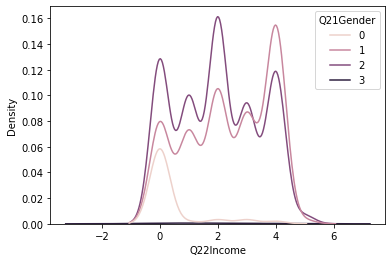

In [392]:
sns.kdeplot(x = data_2018['Q22Income'], hue = data_2018['Q21Gender'])

<AxesSubplot:xlabel='Q7WIFI', ylabel='Density'>

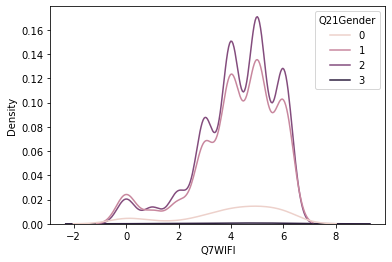

In [393]:
sns.kdeplot(x = data_2018['Q7WIFI'], hue = data_2018['Q21Gender'])

### New datasets

dataset with only numeric columns

In [394]:
# Select columns
data_2018_numeric = data_2018_numeric[columns_numeric_nn[columns_numeric_nn != 'WEIGHT']]
data_2018_numeric.head()

,AIRLINE_CODE,CCGID,DAY,DESTGEO,DESTMARK,DEST_CODE,FLIGHT,GATE,HOME,HOWLONG,...,Q9-1,Q9AirTrain,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,RESPNUM,SAQ,STRATA
0,29,1680,2,7,4,27,80,102,15,255.0,...,0,6,3,4,6,6,4,1842,2,3
1,29,1681,2,7,4,27,80,102,15,315.0,...,0,4,4,5,6,3,4,1844,2,3
2,29,1678,2,7,4,27,80,102,15,165.0,...,0,6,3,4,6,6,2,1840,1,3
3,29,1676,2,7,4,27,80,102,15,225.0,...,0,0,4,5,3,0,4,1837,1,3
4,29,1674,2,7,4,27,80,102,15,175.0,...,1,6,5,5,4,6,5,1833,2,3


In [395]:
data_2018_numeric.isnull().sum()

AIRLINE_CODE    0
CCGID           0
DAY             0
DESTGEO         0
DESTMARK        0
               ..
Q9Rental        0
Q9Restroom      0
RESPNUM         0
SAQ             0
STRATA          0
Length: 65, dtype: int64

dataset with expertly selected columns

In [396]:
columns_expert_2018 = ['DESTGEO', 'DEST_CODE', 'DESTMARK', 'Q2PURP1', 'HOWLONG', 'HOME', 'PEAK', 'METH', 'SAQ', 'Q10Safe', 'Q13GETRATE', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q19Clear', 'Q22Income', 'Q4BAGS', 'Q4FOOD', 'Q4STORE', 'Q4WIFI', 'Q11TSAPRE', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q23FLY', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAY', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8-1', 'NETPRO', 'Q9AirTrain', 'Q9All', 'Q9Boarding', 'Q9Food', 'Q9Rental', 'Q9Restroom', 'Q9-1']
data_2018_expert = data_2018[columns_expert_2018]
data_2018_expert.head()

#columns_expert_2016 = ['DESTGEO', 'DEST CODE', 'DESTMARK', 'HOWLONG', 'HOME', 'METHOD', 'PEAK', 'Q11TSAPRE', 'Q10SAFE', 'Q13GETRATE', 'Q14PASSTHRU', 'Q15PROBLEM', 'Q21INCME', 'Q22FLY', 'Q2PURP1', 'Q4BAGS', 'Q4FOOD', 'Q4STORE', 'Q4WIFI', 'Q5TIMESFLOWN', 'Q5FIRSTTIME', 'Q6LONGUSE', 'Q7ART', 'Q7FOOD', 'Q7STORE', 'Q7SIGN', 'Q7WALKWAYS', 'Q7SCREENS', 'Q7INFODOWN', 'Q7INFOUP', 'Q7WIFI', 'Q7ROADS', 'Q7PARK', 'Q7AIRTRAIN', 'Q7LTPARKING', 'Q7RENTAL', 'Q8COM', 'Q9AIRTRAIN', 'Q9ALL', 'Q9BOARDING', 'Q9FOOD', 'Q9RENTAL', 'Q9RESTROOM', 'Q9COM', 'SAQ']

,DESTGEO,DEST_CODE,DESTMARK,Q2PURP1,HOWLONG,HOME,PEAK,METH,SAQ,Q10Safe,...,Q7RENTAL,Q8-1,NETPRO,Q9AirTrain,Q9All,Q9Boarding,Q9Food,Q9Rental,Q9Restroom,Q9-1
0,7,27,4,2,255.0,15,3,1,2,3,...,6,0,5,6,3,4,6,6,4,0
1,7,27,4,2,315.0,15,3,1,2,4,...,2,0,7,4,4,5,6,3,4,0
2,7,27,4,5,165.0,15,3,1,1,4,...,6,0,7,6,3,4,6,6,2,0
3,7,27,4,3,225.0,15,3,1,1,4,...,0,0,8,0,4,5,3,0,4,0
4,7,27,4,4,175.0,15,3,1,2,3,...,0,11,8,6,5,5,4,6,5,1


## Standardised data

In [397]:
scaled_data_numeric = util.standarisation_data(data_2018_numeric)

In [398]:
scaled_data_expert = util.standarisation_data(data_2018_expert)

## KMeans

### Elbow plot

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\

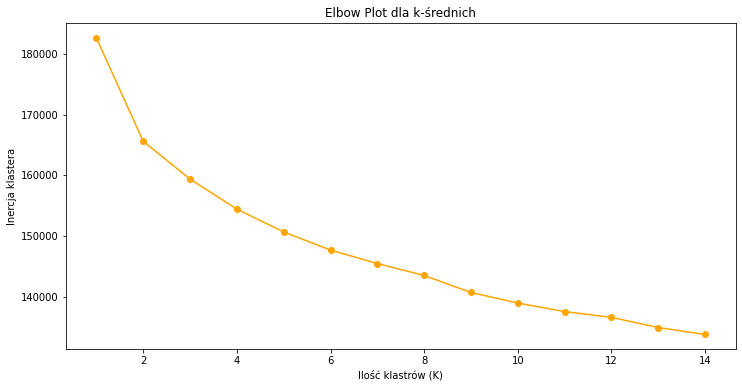

In [399]:
util.find_best_clusters(scaled_data_numeric, 15)

### Dendrogram

In [400]:
# Method - Ward
# clusters = hierarchy.linkage(scaled_data_numeric, method="ward")

In [401]:
# plt.figure(figsize=(8, 6))
# dendrogram = hierarchy.dendrogram(clusters, truncate_mode='lastp')
# plt.savefig('dendrogram.png', transparent = True)

### First trial of k-means on expert data with weights

In [402]:
util.kmeans_data(data_2018, scaled_data_numeric, 3, 'cl_3_numeric')

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [403]:
data_2018.loc[data_2018['cl_3_numeric'] == 0].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,...,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.0
mean,1838.842055,1442.602284,14.658421,4.236917,46.979068,2.162702,2.187441,1.013321,1.966698,1486.666984,...,1.555661,3.949572,1.369172,2.305423,1.683159,1.367269,1.325404,1.087536,0.965553,0.0
std,966.931733,865.970064,8.186073,1.658458,33.116929,0.775320,0.731648,0.130251,0.179508,1763.732579,...,0.804448,1.918414,0.656659,1.579921,0.804447,0.763597,0.753855,0.423080,0.468208,0.0
min,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.0
25%,1026.500000,755.000000,9.000000,3.000000,11.000000,2.000000,2.000000,1.000000,2.000000,394.000000,...,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.670484,0.0
50%,1925.000000,1431.000000,16.000000,4.000000,50.000000,2.000000,2.000000,1.000000,2.000000,857.000000,...,2.000000,4.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.061139,0.0
75%,2620.500000,2159.500000,20.000000,5.000000,73.000000,3.000000,3.000000,1.000000,2.000000,1799.000000,...,2.000000,5.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.178946,0.0
max,9003.000000,9003.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,0.0


In [404]:
data_2018.loc[data_2018['cl_3_numeric'] == 1].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.0,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.0
mean,1781.394595,1389.891892,14.086486,4.054054,53.021622,2.178378,2.216216,1.0,1.967568,1175.600000,...,1.183784,3.875676,1.200000,1.281081,1.421622,1.308108,1.200000,1.200000,1.045154,1.0
std,906.385842,840.502243,8.245096,1.673741,35.172086,0.718972,0.770909,0.0,0.177626,1496.979336,...,0.966142,2.585642,0.785743,1.506118,0.992125,0.901200,0.901689,0.606128,0.526745,0.0
min,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,1.0
25%,939.000000,626.000000,8.000000,3.000000,11.000000,2.000000,2.000000,1.0,2.000000,284.000000,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.670484,1.0
50%,1837.000000,1390.000000,15.000000,4.000000,57.000000,2.000000,2.000000,1.0,2.000000,754.000000,...,2.000000,5.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.106332,1.0
75%,2524.000000,2139.000000,20.000000,5.000000,87.000000,3.000000,3.000000,1.0,2.000000,1445.000000,...,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.486925,1.0
max,3280.000000,2782.000000,31.000000,7.000000,102.000000,3.000000,3.000000,1.0,2.000000,8839.000000,...,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,1.0


In [405]:
data_2018.loc[data_2018['cl_3_numeric'] == 2].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.0
mean,1815.411316,1406.770502,13.691036,4.062937,52.818818,2.134774,2.138589,1.013350,1.812460,1395.202797,...,1.781310,4.129688,1.530833,1.964399,1.952956,1.781945,1.725366,1.102988,1.017704,2.0
std,930.690990,860.890791,8.174537,1.715216,32.894226,0.791746,0.759916,0.130373,0.390468,1703.833495,...,0.601509,1.717583,0.538442,1.390170,0.529366,0.509582,0.562482,0.430483,0.500344,0.0
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,2.0
25%,1074.000000,684.000000,6.000000,3.000000,23.000000,1.000000,2.000000,1.000000,2.000000,412.000000,...,2.000000,3.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.670484,2.0
50%,1840.000000,1394.000000,15.000000,4.000000,54.000000,2.000000,2.000000,1.000000,2.000000,863.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.106332,2.0
75%,2588.000000,2083.000000,19.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1635.000000,...,2.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925,2.0
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,2.0


<AxesSubplot:xlabel='PEAK', ylabel='Count'>

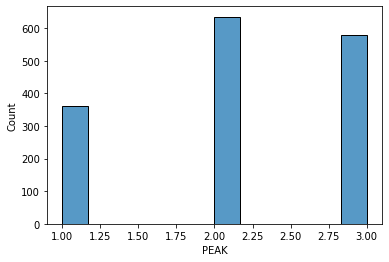

In [406]:
plt.figure()
sns.histplot(data_2018.loc[data_2018['cl_3_numeric'] == 2].PEAK)

<AxesSubplot:xlabel='PEAK', ylabel='Density'>

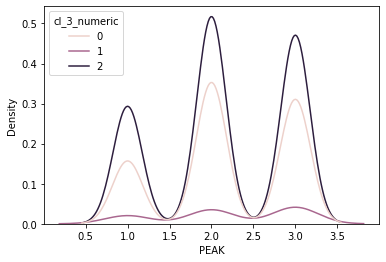

In [407]:
sns.kdeplot(x = data_2018['PEAK'], hue = data_2018['cl_3_numeric'])

In [408]:
a = data_2018.loc[data_2018['cl_3_numeric'] == 1].groupby('Q8-1')['Q8-1'].count()
a[a>20]

Q8-1
0    132
Name: Q8-1, dtype: int64

In [409]:
a = data_2018.loc[data_2018['cl_3_numeric'] == 0].Q7STORE
a = a[a > 0]
np.mean(a[a < 6])

3.2643080124869925

In [410]:
b = data_2018.loc[data_2018['cl_3_numeric'] == 0]
sorted(pd.unique(b['Q8-1']))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 31,
 32,
 33,
 34,
 35,
 36,
 41,
 42,
 44,
 45,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 67,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 101,
 102,
 103,
 104,
 105,
 107,
 108,
 110,
 151,
 152,
 153,
 201,
 202,
 203,
 204,
 205,
 206,
 210,
 211,
 212,
 501,
 502,
 504,
 505,
 510,
 802,
 803,
 804,
 805,
 806,
 991,
 992,
 993,
 994]

## Decision Tree

In [411]:
X_train, X_test, y_train, y_test = train_test_split(data_2018_numeric,
                                                    data_2018.cl_3_numeric, test_size=0.3, random_state=1)

In [412]:
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

In [413]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8161328588374852


In [414]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\\bin'

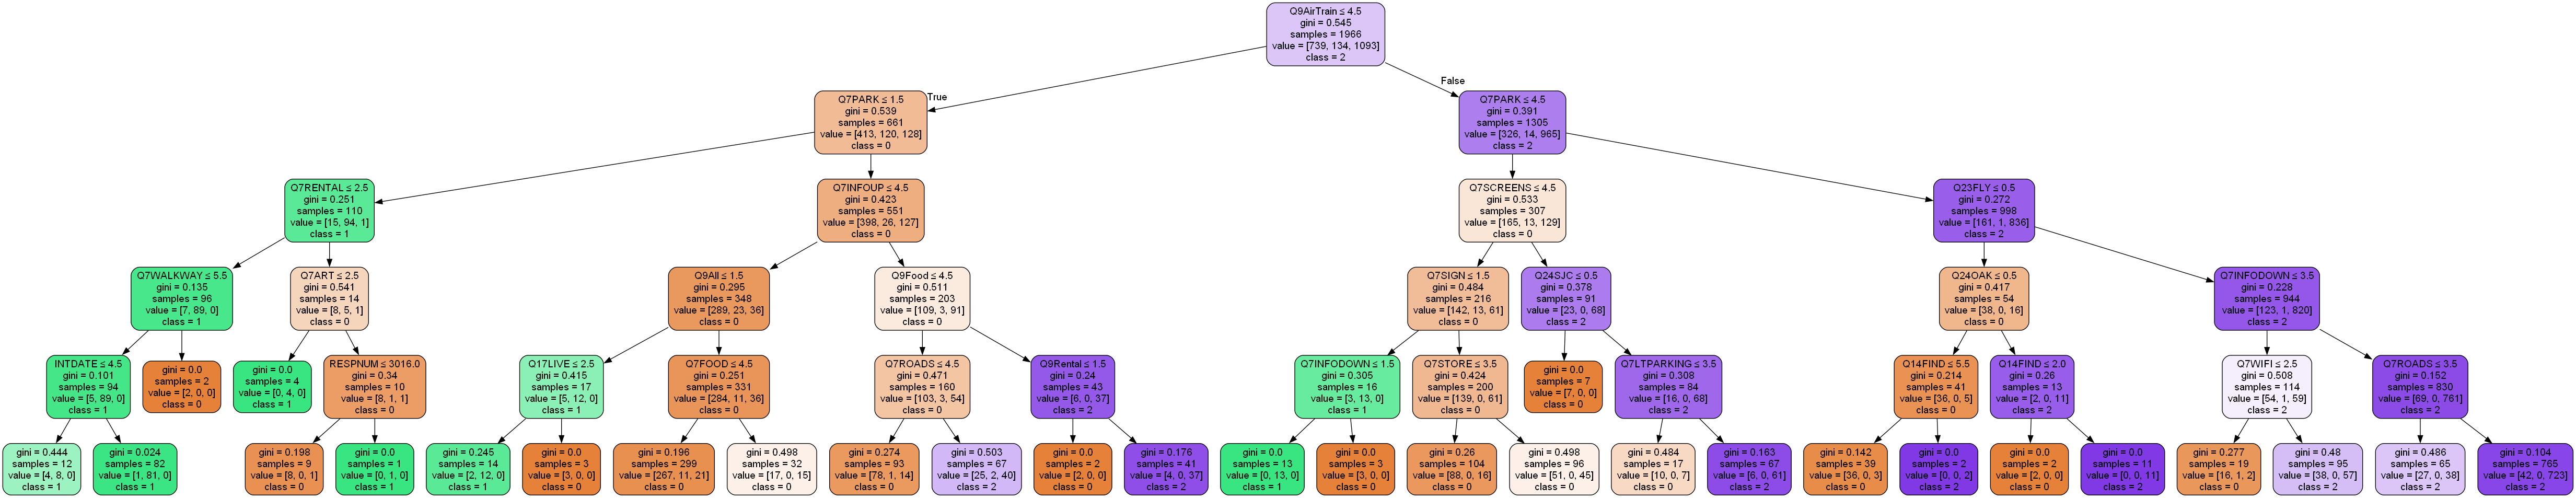

In [415]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = data_2018_numeric.columns,
                class_names=['0', '1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_graph.png')
Image(graph.create_png())

In [416]:
text_representation = tree.export_text(clf, feature_names=data_2018_numeric.columns)
print(text_representation)

|--- Q9AirTrain <= 4.50
|   |--- Q7PARK <= 1.50
|   |   |--- Q7RENTAL <= 2.50
|   |   |   |--- Q7WALKWAY <= 5.50
|   |   |   |   |--- INTDATE <= 4.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- INTDATE >  4.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Q7WALKWAY >  5.50
|   |   |   |   |--- class: 0
|   |   |--- Q7RENTAL >  2.50
|   |   |   |--- Q7ART <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- Q7ART >  2.50
|   |   |   |   |--- RESPNUM <= 3016.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- RESPNUM >  3016.00
|   |   |   |   |   |--- class: 1
|   |--- Q7PARK >  1.50
|   |   |--- Q7INFOUP <= 4.50
|   |   |   |--- Q9All <= 1.50
|   |   |   |   |--- Q17LIVE <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Q17LIVE >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Q9All >  1.50
|   |   |   |   |--- Q7FOOD <= 4.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Q7FOOD >  4.50
|   |   |   |   |   |--- class: 0
|   |   |---

In [417]:
key_feature = pd.unique(util.used_feature(_tree, clf, data_2018_numeric.columns))
key_feature

array(['Q9AirTrain', 'Q7PARK', 'Q7RENTAL', 'Q7WALKWAY', 'INTDATE',
       'Q7ART', 'RESPNUM', 'Q7INFOUP', 'Q9All', 'Q17LIVE', 'Q7FOOD',
       'Q9Food', 'Q7ROADS', 'Q9Rental', 'Q7SCREENS', 'Q7SIGN',
       'Q7INFODOWN', 'Q7STORE', 'Q24SJC', 'Q7LTPARKING', 'Q23FLY',
       'Q24OAK', 'Q14FIND', 'Q7WIFI'], dtype=object)

## K-means with key features

In [418]:
data_2018_tree = data_2018_numeric[key_feature]
scaled_data_tree = util.standarisation_data(data_2018_tree)

In [419]:
util.kmeans_data(data_2018, scaled_data_tree, 3, 'cl_3_tree')

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [420]:
data_2018.loc[data_2018['cl_3_tree'] == 0].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,...,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.0
mean,1850.161926,1416.536105,14.357768,4.226477,47.307440,2.146608,2.199125,1.012035,1.966083,1437.247265,...,3.958425,1.376368,2.207877,1.676149,1.354486,1.314004,1.100656,0.961737,0.135667,0.0
std,955.859715,876.475978,8.000959,1.658765,33.806268,0.774989,0.747218,0.127610,0.181114,1740.835941,...,1.966427,0.662341,1.563025,0.808051,0.775548,0.771111,0.454670,0.476398,0.445468,0.0
min,11.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,0.0
25%,1115.500000,730.250000,9.000000,3.000000,11.000000,2.000000,2.000000,1.000000,2.000000,364.750000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.670484,0.000000,0.0
50%,1923.500000,1385.000000,15.000000,4.000000,48.000000,2.000000,2.000000,1.000000,2.000000,821.000000,...,4.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.994275,0.000000,0.0
75%,2599.750000,2095.750000,20.000000,5.000000,76.000000,3.000000,3.000000,1.000000,2.000000,1798.000000,...,6.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.178946,0.000000,0.0
max,9003.000000,9003.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,2.000000,0.0


In [421]:
data_2018.loc[data_2018['cl_3_tree'] == 1].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0
mean,1830.270073,1386.605839,14.255474,4.043796,51.992701,2.160584,2.124088,1.0,1.956204,1235.708029,...,4.029197,1.226277,1.321168,1.430657,1.343066,1.226277,1.167883,1.051758,0.985401,1.0
std,928.926622,831.285224,8.438383,1.635402,34.030155,0.739968,0.761628,0.0,0.205391,1530.586821,...,2.517415,0.766895,1.576175,0.953289,0.886483,0.882782,0.508304,0.549483,0.120379,0.0
min,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,1.0
25%,931.000000,649.000000,8.000000,3.000000,12.000000,2.000000,2.000000,1.0,2.000000,358.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.670484,1.000000,1.0
50%,1998.000000,1280.000000,15.000000,4.000000,56.000000,2.000000,2.000000,1.0,2.000000,768.000000,...,5.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.106332,1.000000,1.0
75%,2579.000000,2156.000000,20.000000,5.000000,84.000000,3.000000,3.000000,1.0,2.000000,1454.000000,...,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925,1.000000,1.0
max,3280.000000,2752.000000,31.000000,7.000000,102.000000,3.000000,3.000000,1.0,2.000000,8839.000000,...,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.887528,1.000000,1.0


In [422]:
data_2018.loc[data_2018['cl_3_tree'] == 2].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree
count,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.00000,1758.000000,...,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.0
mean,1806.614334,1422.910125,13.920364,4.082480,52.278726,2.147895,2.145620,1.013652,1.82992,1417.344141,...,4.092150,1.503413,2.019909,1.920364,1.740614,1.683732,1.100114,1.015858,1.747440,2.0
std,936.971764,856.157423,8.273114,1.713557,32.769103,0.787476,0.750913,0.129954,0.37581,1715.128407,...,1.745809,0.561261,1.431475,0.584787,0.554241,0.595064,0.429676,0.492673,0.664518,0.0
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,2.0
25%,1025.750000,698.500000,6.000000,3.000000,22.000000,2.000000,2.000000,1.000000,2.00000,414.000000,...,3.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.670484,2.000000,2.0
50%,1836.500000,1424.500000,15.000000,4.000000,54.000000,2.000000,2.000000,1.000000,2.00000,869.000000,...,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.106332,2.000000,2.0
75%,2592.750000,2119.750000,20.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.00000,1703.000000,...,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925,2.000000,2.0
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.00000,8839.000000,...,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,2.000000,2.0


In [423]:
data_2018.loc[data_2018['cl_3_tree'] == 1].groupby('Q13COUNTY')['Q13COUNTY'].count()

Q13COUNTY
0     37
1     11
2      6
3      3
4      1
5     26
6      3
7      7
8      1
9      3
10     1
11    34
19     1
27     1
29     1
30     1
Name: Q13COUNTY, dtype: int64

<AxesSubplot:xlabel='Q13COUNTY', ylabel='Density'>

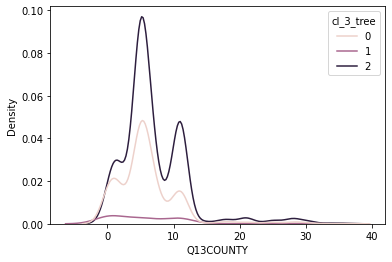

In [424]:
sns.kdeplot(x = data_2018['Q13COUNTY'], hue = data_2018['cl_3_tree'])

In [425]:
a = data_2018.loc[data_2018['cl_3_tree'] == 2].Q10Safe
a = a[a > 0]
np.mean(a[a < 6])

4.500860585197935

### PCA

In [426]:
from sklearn.decomposition import PCA

In [427]:
pca_data = PCA(n_components=10)
principalComponents = pca_data.fit_transform(scaled_data_numeric)

print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))

Explained variation per principal component: [0.15333854 0.05189775 0.0484379  0.03782492 0.03174339 0.03122292
 0.02926803 0.02720571 0.02352094 0.02291887]


In [428]:
data_2018_pca = pd.DataFrame(data = principalComponents,
                             columns = ['principal_component'+str(i) for i in range(1, 11)])
data_2018_pca.head()

,principal_component1,principal_component2,principal_component3,principal_component4,principal_component5,principal_component6,principal_component7,principal_component8,principal_component9,principal_component10
0,-0.675906,1.423990,2.505871,0.328150,0.252552,-0.250072,-0.779211,-0.333083,0.577716,-1.709498
1,-0.355513,0.606273,2.523412,0.197120,0.255386,1.933214,0.373702,1.942772,-1.371679,0.182921
2,-1.744228,0.908005,1.697264,-2.807708,-1.422837,2.407545,0.616841,0.747304,0.330510,-0.615908
3,6.999036,-0.991975,2.012177,2.563535,0.864529,2.785739,-0.002546,2.132314,-0.975940,-0.074418
4,8.077857,-3.354497,2.376411,0.617184,-3.435149,-2.525310,3.573932,1.329533,0.796119,-1.513474


In [429]:
util.kmeans_data(data_2018, data_2018_pca, 3, 'cl_3_pca')

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [430]:
data_2018.loc[data_2018['cl_3_pca'] == 0].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree,cl_3_pca
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,...,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.0
mean,1818.377778,1456.643478,14.583575,4.254106,46.584541,2.166184,2.185507,1.012560,1.962319,1482.437681,...,1.363285,2.280193,1.685990,1.374879,1.330435,1.088889,0.961974,0.025121,0.404831,0.0
std,971.980744,867.818511,8.144341,1.653836,33.041463,0.771479,0.733545,0.127605,0.190516,1763.023694,...,0.656322,1.582895,0.804332,0.762102,0.752167,0.426200,0.468363,0.218459,0.802183,0.0
min,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,0.000000,0.0
25%,983.500000,772.500000,9.000000,3.000000,11.000000,2.000000,2.000000,1.000000,2.000000,394.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.670484,0.000000,0.000000,0.0
50%,1906.000000,1441.000000,15.000000,4.000000,48.000000,2.000000,2.000000,1.000000,2.000000,857.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.061139,0.000000,0.000000,0.0
75%,2604.000000,2182.500000,20.000000,5.000000,73.000000,3.000000,3.000000,1.000000,2.000000,1799.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.178946,0.000000,0.000000,0.0
max,9003.000000,9003.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,2.000000,2.000000,0.0


In [431]:
data_2018.loc[data_2018['cl_3_pca'] == 1].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree,cl_3_pca
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0,183.000000,183.0
mean,1786.224044,1379.595628,14.125683,4.038251,52.994536,2.191257,2.229508,1.0,1.967213,1169.185792,...,1.202186,1.262295,1.409836,1.306011,1.196721,1.202186,1.044732,1.0,0.732240,1.0
std,904.231395,838.821341,8.253574,1.675178,35.362875,0.712163,0.764460,0.0,0.178567,1502.653104,...,0.789767,1.499835,0.989678,0.904395,0.904561,0.609085,0.529610,0.0,0.444006,0.0
min,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,1.0,0.000000,1.0
25%,949.500000,614.500000,8.000000,3.000000,10.000000,2.000000,2.000000,1.0,2.000000,276.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.670484,1.0,0.000000,1.0
50%,1837.000000,1378.000000,15.000000,4.000000,57.000000,2.000000,2.000000,1.0,2.000000,754.000000,...,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.106332,1.0,1.000000,1.0
75%,2527.000000,2134.000000,20.000000,5.000000,87.000000,3.000000,3.000000,1.0,2.000000,1359.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.486925,1.0,1.000000,1.0
max,3280.000000,2782.000000,31.000000,7.000000,102.000000,3.000000,3.000000,1.0,2.000000,8839.000000,...,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,1.0,1.000000,1.0


In [432]:
data_2018.loc[data_2018['cl_3_pca'] == 2].describe()

,RESPNUM,CCGID,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,...,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,cl_3_numeric,cl_3_tree,cl_3_pca
count,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,...,1591.00000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.000000,1591.0
mean,1828.361408,1399.159648,13.745443,4.055311,53.020113,2.131364,2.138906,1.013828,1.817096,1399.335638,...,1.53237,1.985544,1.949089,1.772470,1.717788,1.101823,1.019590,1.962288,1.948460,2.0
std,927.969686,859.381361,8.206528,1.716207,32.882862,0.794456,0.759138,0.131980,0.386709,1704.193155,...,0.53909,1.394208,0.534870,0.519817,0.569832,0.428178,0.499400,0.272119,0.316996,0.0
min,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038,0.000000,0.000000,2.0
25%,1099.500000,663.500000,6.000000,3.000000,23.000000,1.000000,2.000000,1.000000,2.000000,412.000000,...,1.00000,1.000000,2.000000,2.000000,2.000000,1.000000,0.670484,2.000000,2.000000,2.0
50%,1852.000000,1382.000000,15.000000,4.000000,54.000000,2.000000,2.000000,1.000000,2.000000,869.000000,...,2.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.106332,2.000000,2.000000,2.0
75%,2595.000000,2075.000000,19.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1657.500000,...,2.00000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925,2.000000,2.000000,2.0
max,9004.000000,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,...,3.00000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528,2.000000,2.000000,2.0
